## 1. Distributions
### 1.1 Uniform Distribution

In a uniform distribution, all values are equally likely, such that:<br><br>
$f_{x}(x;a,b)=\frac{1}{b-a}$ if x $\in [a,b]$ OR<br>
$f_{x}(x;a,b)=0$ otherwise

For the Probability Density Function (pdf):<br>
<img src="uniform.png" width="400" height="150"><br><br>

And...<br>
$f_{x}(x;a,b)=0$ if $x<a$ OR<br>
$f_{x}(x;a,b)=x$ if $a<=x<=b$ OR<br>
$f_{x}(x;a,b)=1$ if $x>b$

For the Cumulative Distribution Function (cdf):<br>
<img src="uniform_cdf.png" width="400" height="150"><br><br>

There are a variety of pseudo-random number generators (e.g., Neumann, congruential, Tausworthe, lagged Fibonacci and many more), but all of them posess the following traits:
- uniformly distributed
- statistically independent
- reproducible
- non-repeating for a reasonable length

The Python standard library provides a module called random, that allows you to generate discrete "random" numbers (integers) and continuous random numbers (floats). In both cases, it draws the numbers from a uniform distribution. Although pseudo-random, the random package is deterministic and allows you to set a "seed" so that pseudo-random numbers can be repeatet using the same seed. This comes in quite handy, especially for reproducing experiments.



In [5]:
from random import seed, random, randint

## Generating a discrete random number
seed(123)
print(random())

## Repeating the same number using same seed
seed(123)
print(random())

## Generating a continuous random number between 0 and 10
print(randint(0,10))

0.052363598850944326
0.052363598850944326
1


### 1.2 Discrete Random Variables
#### 1.2.1 Binomial and Negative Binomial Distribution

A single Bernoulli trial is a random experiment with two elementary outcomes $\Omega=\{"Success","Failure"\}$, where $P\{"Success"\}=p $ AND $ P\{"Failure"\}=1-p$. A sequence of N independent Bernoulli trials with the same probability of success results in two important distributions: Binomial and Negative Binomial.<br>

The **Binomial Distribution** is concerned with the number of successes $N_{B}$ in $N$ Bernoulli trials.

If the random variable $N_{B}\sim Binom(p,N)$, it then has a Probability Mass Function (pmf) like so:
$P\{N_{B}=n;p,N\}=\binom{N}{n} p^{n}(1-p)^{N-n}$, with<br>
Mean: $E[N_{B}]=Np$, and<br>
Variance: $V[N_{B}]=Np(1-p)$

An example for a binomial distribution would be the number of positive results in a clinical trial.<br>

The **Negative Binomial Distribution** on the other hand measures the number of "Fails" in Bernoulli trials until we see $s$ "Successes", where successes have a probability of $p$. So, the total number of trials is $N=s+N_{NB}$.

If a random variable is negative binomial distributed like $N_{NB}\sim NBinom(p,s)$, it then has a pmf like so:
$P\{N_{NB}=n;p,s\}=\binom{n+s-1}{n}p^{s}(1-p)^{n}$, with<br>
Mean: $E[N_{NB}]=s\frac{1-p}{p}$, and<br>
Variance: $V[N_{NB}]=s\frac{(1-p)}{p^{2}}$

A random variable that is negative binomial distributed and counts all failures until the first success ($N_{G}\sim NBinom(p,1)$) has a geometric distribution.

An example for a negative binomial distribution would be the number of people that will reject an offer before $s$ people have accepted the offer, where for each offer the probability of acceptance is $p$.

Below, I am estimating a Binomial distribution both manually and by using the scipy.stats package "binom":

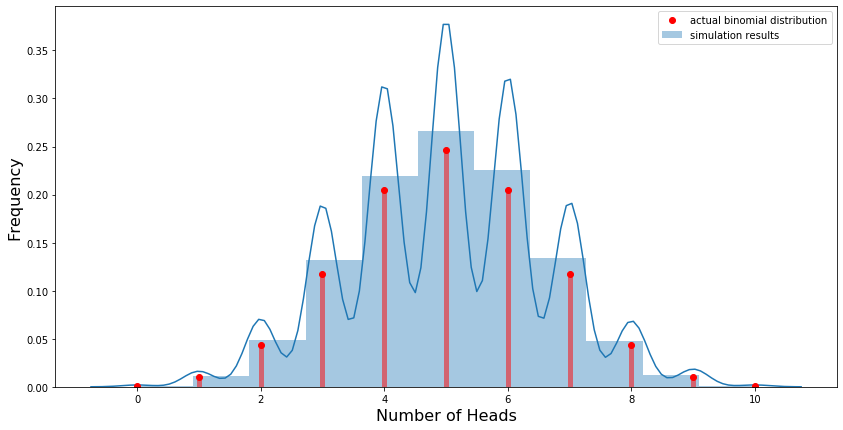

In [14]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns

trials = 10_000
N = 10
p = 0.5

## Manual approximation
success = []
for trial in range(trials):
    tosses = [random() for toss in range(N)]
    success.append(len(list(filter(lambda x: x>p, tosses))))
    
## scipy.stats
binom_pmf = binom.pmf(range(N+1), N, p)

## Comapring both distribution - Manual distribution approaches real NB for large trials
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(success, bins=11, label='simulation results')
ax.set_xlabel("Number of Heads",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
ax.plot(range(N+1), binom_pmf, 'ro', label='actual binomial distribution')
ax.vlines(range(N+1), 0, binom_pmf, colors='r', lw=5, alpha=0.5)
plt.legend()
plt.show()

Assume you are posting something on Linkedin and 10_000 people read the post while 200 actually give it a like. Then:<br>
$N=10,000$<br>
$n=200$, and<br>
$p=\frac{200}{10,000}=0.02$<br>

Given this information, what would be the probability of getting exactly 220 likes? You could either plug the numbers into the pmf or simply use the stats.binom package:

In [25]:
binom(10000, 0.02).pmf(220)

0.010115664717799459

Basci commands for binomial distributions:

In [43]:
from scipy.stats import binom

X = binom(10, 0.2) # Declare X to be a binomial random variable
print(X.pmf(3)) # P(X = 3)
print(X.cdf(4)) # P(X <= 4)
print(X.mean()) # E[X]
print(X.var()) # Var(X)
print(X.std()) # Std(X)
print(X.rvs()) # Get a random sample from X
print(X.rvs(10)) # Get 10 random samples form X

0.20132659200000022
0.9672065024000001
2.0
1.6
1.2649110640673518
1
[0 3 1 0 4 2 2 1 2 3]


Basic python commands for geometric distributions:

In [42]:
from scipy.stats import geom

X = geom(0.75) # Declare X to be a geometric random variable
print(X.pmf(3)) # P(X = 3)
print(X.rvs()) # Get a random sample from Y

0.046875
1


#### 1.2.2 Poisson Distribution

If binomial trials have a small probability $p$ and the trials are repeated every unit of time or space, success will be a rare event and the distribution becomes close to Poisson distribution. Poisson distribution counts events in fixed time periods or space intervals and is used to predict the number of events occuring in the future. Or, more formally, to predict the probability of a given number of events occuring in a fixed interval of time or space.

The poisson distribution handels a problem the binomial distribution can't. For a given unit in time or space, a binomial distribution can only have either one or zero successes. But what if there are actually more than one successes lets say per hour. Well, you could divide one hour into minutes and assign one or zero to each minute. But what if there are also multiple successes for a minute. You see, this could go on infinitely. As units of time or space become infinitesimal, the binomial distribution becomes poisson (if you do the actual derivation, that's where the $e$ is coming from). Another fact that results from this, is that you do not need to know the number of trials beforehand for a poisson distribution, since we are assuming $N$ infinitely large and $p$ infinitesimal.

If a variable is poisson distributed like $N_{P}\sim Pois(\lambda)$, it has pmf $P\{N_{P}=n;\lambda\}=e^{-\lambda}\frac{\lambda^{n}}{n!}$, where $\lambda$ is the rate of the event per unit of space or time, and $n$ is the number units.<br>

The pmf of Poisson distributed variables with different rates $\lambda$:<br>
<img src="poisson.png" width="400" height="150"><br>

Example: Customers arrive on average six times per hour. How unusual is it to have ten or more customers in one hour?

In [15]:
import math
from scipy.stats import poisson

rate = 6
new_rate = 10

## Manually calculating p
print(math.exp(-rate)*((rate**new_rate)/
                       math.factorial(new_rate)))

## Using scipy.stats function
print(poisson.pmf(new_rate, rate))

0.04130309341233772
0.04130309341233764


It is very unlikely, that suddenly ten or more customers show up, if on average no more than six customers show up.<br>

Finally, some basic commands regarding the poisson distribution in Python:

In [45]:
from scipy.stats import poisson

Y = poisson(2) # Declare Y to be a poisson random variable
print(Y.pmf(3)) # P(Y = 3)
print(Y.rvs()) # Get a random sample from Y

0.18044704431548356
1


### 1.3 Continuous Random Variables
#### 1.3.1 Exponential Distribution

The exponential distribution's most important application comes from its connection with the poisson distribution. If the number of events follows a poisson distribution, then the amount of time between events (e.g., the time where no event is happening) follows the exponential distribution. This helps understanding how the events counted by poisson distribution are distributd in time or space.<br>

pdf: $f_{X_{E}}(x;\lambda)=\{\lambda e^{-\lambda x}, x>=0$<br>
cdf: $F_{X_{E}}(x)=\{1-e^{-\lambda x}, x>=0$<br>
Mean: $E[X_{E}]=\frac{1}{\lambda}$<br>
Variance: $V[X_{E}]=\frac{1}{\lambda^{2}}$

Furthermore, for $X_{E}\sim Exp(\lambda)$ the following is true:<br>
$P\{X_{E}>b|X_{E}>a\}=P\{X_{E}>b-a\}, b>a>0$<br>

This is the so called memoryless property, meaning no matter how many units of time or space appeared previously, the probability of an event will still be the same. Be careful with this, as it is not always appropiate. Think of two machines. One is new and another one has already been running for nine years. According to the exponantial function, both have the same probability of working for another year without failure. However, intuitively, this cannot be right. Indeed, a Weibull distribution, for example, would be much more appropiate here. Now consider the probability of car accidents, though. The probability of a person having an accident within the next year does not change, no matter how long he or she has been driving before (ceteris paribus - learning effects etc. aside).

The pdf of an exponential distribution:<br>
<img src="exponential1.png" width="400" height="150"><br>

The cdf of an exponential distribution:<br>
<img src="exponential2.png" width="400" height="150"><br>

To give an example, lets stick with failure modeling (aka reliability modeling). Assume the average number of hours a certain hardware can run before it needs to restart is 8,000 hours.<br>
1. What is the probability that you will be able to run the hardware without restarting for 10,000 hours?<br>
2. What is the probability, that the hardware does not require a restart between 12 months and 18 months?

In [52]:
from scipy.stats import expon

## Create exponential distribution object
B = expon(1)

## 1. 10_000/8_000
print(B.pdf(1.25))

## 2. (18*30*24)/8_000 & (12*30*24)/8_000
print(B.cdf(1.62)-B.cdf(1.08))

0.7788007830714049
0.3851719087919612


In [38]:
from scipy.stats import expon

B = expon(4) # Declare B to be a normal random variable
print(B.pdf(1)) # f(1), the probability density at 1
print(B.cdf(2)) # F(2) which is also P(B < 2)
print(B.rvs())  # Get a random sample from B

0.0
0.0
6.163445719099677


#### 1.3.2 Gamma Distribution

While the exponential distribution predicts the wait time until the very first event, the gamma distribution, on the other hand, predicts the wait time until the k-th event occurs. So, the gamma distribution is also derived from the poisson distribution, with the difference, that $T$ is the wait time until the k-th event (therefore, if $k=1$, pdf of gamma == pdf of exponential). To derive the gamma distriubtion - as for the exponential - you first define the cdf and then differentiate it to find $p$ around a certain point. To clarify, if arrivals of events follow a poisson process with a rate $\lambda$, the wait time until $k$ arrivals follows $\Gamma(k,\lambda)$.<br>

Luckily, the derivation has already been done, so here are the function's properties. If $X\sim Gamma(\alpha, \beta)$, then:<br>
pdf: $f(x;\alpha, \beta)=\frac{x^{\alpha-1}e^{-\frac{x}{\beta}}}{\beta^{\alpha}\Gamma(\alpha)}$<br>
Mean: $E[X]=\alpha \beta$<br>
Variance: $V[X]=\alpha \beta^{2}$<br>

Here, $\alpha$ can be substituted with $k$, the number of events for which you are waiting, and $\beta$ is equal to$\lambda$, the rate of events, which follows a poisson distribution. What can be somewhat confusing though, is that there is an alternative writing of the gamma distribution, where the parameters are $k$ and $\Theta$. Also, the pdf looks a little bit different:<br>

pdf: $\frac{1}{\Gamma (k)\Theta^{k}}x^{k-1}e^{-\frac{x}{\Theta}}$<br>

In this case, $\Theta$ is a reciprocal of the event rate $\lambda$, which is the mean wait time (avg. time between event arrivals). $k$ stays the number of events. To my knwoledge, the upper form is used more often.

pdf of the gamma distribution:<br>
<img src="gamma.png" width="400" height="150"><br>

So, what is the gamma distribution good for? The gamma distribution can do everything the exponential distribution can and more - wait time modeling, reliability modeling, service time modeling etc. To sum up the "family" of poisson processes:
- poisson distribution is used to predict the number of events in the future
- exponential distribution is used to predict the wait time until the very first event
- gamma distribution is used ti predict the wait time until the k-th event

<br>
Finally, here are some basic commands regarding the gamma distribution in Python:

In [54]:
from scipy.stats import gamma

G = gamma(4)
print(G.pdf(1)) # f(1), the probability density at 1
print(G.cdf(2)) # F(2) which is also P(G < 2)
print(G.rvs())  # Get a random sample from G

0.06131324019524039
0.14287653950145296
3.8406417784107356


#### 1.3.3 Normal (Gaussian) Distribution

The normal distribution is probablt one of the most used distributions. All normal distributions are symmetric and have a bell-shaped density curve with a singel peak. Two quantities have to be specified: The mean $\mu$ and the standard deviation sigma $\sigma$.<br>

A normally distributed random variable $X_{N}\sim Norm(\mu,\sigma)$ has the following characteristics:<br>

pdf: $f_{X_{N}}(x;\mu, \sigma)=\frac{1}{\sigma \sqrt{2\pi}}e^{\frac{-(x-\mu)^{2}}{2\sigma^{2}}}$<br>
cdf: $\frac{1}{2}[1+erf(\frac{x-\mu}{\sigma \sqrt{2}})]$<br>
Mean: $E[X_{N}]=\mu$<br>
Variance: $V[X_{E}]=\sigma^{2}$<br>

If $\mu=0$ and $\sigma^{2}=1$, then $Z\sim Norm(0,1)$ is **standard normal**.<br>

Some more facts about the gaussian distribution:
- Is the limit distribution for Central Limit Theorem (CLT)
- Completely defined by $\mu$ and $\sigma$
- For gaussian variables $X$ and $Y$ independence is equivalent to zero correlation<br>

pdf:<br>
<img src="normal1.png" width="400" height="150"><br>

cdf:<br>
<img src="normal2.png" width="400" height="150"><br>

Finally, here are some basic commands regarding the normal distribution in Python:

In [41]:
from scipy.stats import norm

A = norm(3, math.sqrt(16)) # Declare A to be a normal random variable
print(A.pdf(4)) # f(3), the probability density at 3
print(A.cdf(2)) # F(2), which is also P(Y < 2)
print(A.rvs()) # Get a random sample from A

0.09666702920071232
0.4012936743170763
-2.454577332071257


#### 1.3.4 Beta Distribution



In [46]:
from scipy.stats import beta

X = beta(1, 3) # Declare X to be a beta random variable
print(X.pdf(0.5)) # f(0.5), the probability density at 1
print(X.cdf(0.7)) # F(0.7) which is also P(X < 0.7)
print(X.rvs()) # Get a random sample from X

0.7500000000000001
0.973
0.24159266553478354


Souces:<br> 
[1] http://web.stanford.edu/class/archive/cs/cs109/cs109.1192/handouts/pythonForProbability.html<br>
[2] https://towardsdatascience.com/poisson-distribution-intuition-and-derivation-1059aeab90d